In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint
# VGG 16
from tensorflow.keras.applications import VGG16

In [2]:
dataset = tf.keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

(train_images0, train_labels0), (test_images0, test_labels0) = dataset.load_data()

print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))

train_labels = train_labels0.reshape(-1)
test_labels = test_labels0.reshape(-1)

num_classification_categories = len(class_names)
print('Number of classes=%d' % num_classification_categories)

170508288/170498071 [==============================] - 91s 1us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Number of classes=10


In [3]:
train_images = tf.keras.applications.vgg19.preprocess_input(train_images0)
test_images = tf.keras.applications.vgg19.preprocess_input(test_images0)

print(train_images.shape, test_images.shape)

input_shape = train_images.shape[1:]

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
input = layers.Input(shape=input_shape)
model_ = VGG16(weights='imagenet', include_top=False, input_tensor=input)
# include_top=False means that we exclude the last (top) layers 
# (which are responsible for classifying ImageNET)
# So we're only loading the convolutional part of the network (see summary below)
model_.summary()

Metal device set to: Apple M1


2022-04-01 14:03:34.680509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-01 14:03:34.680658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [5]:
for layer in model_.layers: 
  layer.trainable = False

# Use the generated model 
last_layer = model_.output  # these are the features!

In [6]:
# Now we are going to add the fully connected layers onto the model.
x = layers.Flatten()(last_layer)

# Add fully-connected layers for classification (remember that we need to flatten the features first)
# TO DO: THIS IS OUR CLASSIFIER. WITH THE CONFIGURATION I'M GIVING YOU, YOUR MODEL WILL OVERFIT TERRIBLY. YOUR JOB IS TO EDIT THESE LAYERS SO THAT THE VALIDATION ACCURACY IS >0.65 AND THERE'S NO OVERFITTING
# HINTS: add a Dropout layer between 'fc1' and 'fc2' and reduce the number of neurons in  'fc1'.
# ----- beginning of classifier
x = layers.Dense(256, activation='relu', name='fc1')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu', name='fc2')(x)
# ----- end of classifier

prediction = layers.Dense(num_classification_categories, activation='softmax')(x)

# What does the model look like now?
model = models.Model(inputs=input, outputs=prediction)
model.summary()  # TO DO:  you will need this for the Moodle quiz

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [7]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=keras.optimizers.Adam(), 
                 metrics=['accuracy'])

my_callbacks = [ModelCheckpoint(filepath='vgg16_model_featureExtraction.h5', save_best_only=True)]  # DON'T CHANGE THIS LINE

# You can change the number of epochs, batch_size...
history = model.fit(train_images, train_labels, batch_size=128,
                       epochs=5,
                       validation_data=(test_images, test_labels),
                       callbacks=my_callbacks)
np.save('history_featureExtraction.npy', [history.history['accuracy'], history.history['val_accuracy']])  # DON'T CHANGE THIS LINE; you'll need this for the Moodle quiz

2022-04-01 14:03:36.645106: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-04-01 14:03:36.923098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - ETA: 0s - loss: 1.9159 - accuracy: 0.4939

2022-04-01 14:03:59.384637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 27s 60ms/step - loss: 1.9159 - accuracy: 0.4939 - val_loss: 1.1660 - val_accuracy: 0.5923
Epoch 2/5
391/391 [==============================] - 23s 58ms/step - loss: 1.1145 - accuracy: 0.6160 - val_loss: 1.0528 - val_accuracy: 0.6351
Epoch 3/5
391/391 [==============================] - 24s 62ms/step - loss: 0.9905 - accuracy: 0.6522 - val_loss: 1.0170 - val_accuracy: 0.6524
Epoch 4/5
391/391 [==============================] - 24s 62ms/step - loss: 0.9053 - accuracy: 0.6832 - val_loss: 0.9935 - val_accuracy: 0.6602
Epoch 5/5
391/391 [==============================] - 24s 63ms/step - loss: 0.8418 - accuracy: 0.7042 - val_loss: 0.9871 - val_accuracy: 0.6625


In [31]:
# We specify the shape of our inputs
input = layers.Input(shape=input_shape)

# Load VGG16 again
model_ = VGG16(weights='imagenet', include_top=False, input_tensor=input)
#print(model_.summary())

In [32]:
# get last layer so we can add our classifier on top again
last_layer = model_.output

# Flatten
x = layers.Flatten()(last_layer)

# Add your classifier
# ----- beginning of classifier
# TO DO: COPY HERE THE CLASSIFIER CONFIGURATION THAT WORKED FOR YOU IN THE FEATURE EXTRACTION TASK
x = layers.Dense(128, activation='relu', name='fc1')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu', name='fc2')(x)

# ----- end of classifier

prediction = layers.Dense(num_classification_categories, activation='softmax')(x)

# Create model
model = models.Model(input, prediction)



print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [33]:
# We first need to freeze all the layers except for our classifier (as we did for the feature extraction approach)

# Choose the layers which are updated while training
LAYERS_TO_FREEZE = len(model_.layers)  # DON'T CHANGE THIS
for layer in model.layers[:LAYERS_TO_FREEZE]:
	layer.trainable = False
for layer in model.layers[LAYERS_TO_FREEZE:]:
  layer.trainable = True

for i, layer in enumerate(model.layers):
  print(layer.name, layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten_5 True
fc1 True
dropout_8 True
fc2 True
dense_5 True


In [39]:
cnn = models.Sequential([
    layers.Conv2D(filters=64,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=128,
          kernel_size=(3, 3),
          activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=256,
          kernel_size=(3, 3),
          activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Stop training when the monitored metric has stopped improving.
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=10)

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(train_images,
                  train_labels,
                  epochs=10,
                  batch_size=64,
                  callbacks=[early_stop],
                  validation_data=(test_images, test_labels))

np.save('history_fineTuning_1.npy', [history.history['accuracy'], history.history['val_accuracy']])  # don't change this line

Epoch 1/10


2022-04-01 15:22:22.246508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.5932 - accuracy: 0.4403

2022-04-01 15:22:42.391378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 22s 27ms/step - loss: 1.5932 - accuracy: 0.4403 - val_loss: 1.2296 - val_accuracy: 0.5681
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 1.1977 - accuracy: 0.5725 - val_loss: 1.1024 - val_accuracy: 0.6211
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 1.0370 - accuracy: 0.6333 - val_loss: 0.8989 - val_accuracy: 0.6820
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.9398 - accuracy: 0.6704 - val_loss: 0.8225 - val_accuracy: 0.7118
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.8678 - accuracy: 0.6988 - val_loss: 0.7585 - val_accuracy: 0.7341
Epoch 6/10
782/782 [==============================] - 21s 26ms/step - loss: 0.8078 - accuracy: 0.7200 - val_loss: 0.7275 - val_accuracy: 0.7455
Epoch 7/10
782/782 [==============================] - 21s 26ms/step - loss: 0.7667 - accuracy: 0.7332 - val_loss: 0.7065 - val_accuracy: 0.7553
Epo

In [40]:
history = cnn.fit(train_images,
                  train_labels,
                  epochs=10,
                  batch_size=64,
                  callbacks=[early_stop],
                  validation_data=(test_images, test_labels))

np.save('history_fineTuning_2.npy', [history.history['accuracy'], history.history['val_accuracy']])  # don't change this line

Epoch 1/10
782/782 [==============================] - 21s 27ms/step - loss: 0.6466 - accuracy: 0.7758 - val_loss: 0.6401 - val_accuracy: 0.7793
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.6201 - accuracy: 0.7844 - val_loss: 0.6629 - val_accuracy: 0.7803
Epoch 3/10
782/782 [==============================] - 21s 26ms/step - loss: 0.5936 - accuracy: 0.7940 - val_loss: 0.6522 - val_accuracy: 0.7827
Epoch 4/10
782/782 [==============================] - 21s 26ms/step - loss: 0.5782 - accuracy: 0.8010 - val_loss: 0.6246 - val_accuracy: 0.7920
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5574 - accuracy: 0.8049 - val_loss: 0.6490 - val_accuracy: 0.7849
Epoch 6/10
782/782 [==============================] - 21s 26ms/step - loss: 0.5419 - accuracy: 0.8109 - val_loss: 0.6045 - val_accuracy: 0.8016
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 0.5217 - accuracy: 0.8186 - val_loss: 0.6215 - val_accuracy:

In [34]:
# Train the model (remember that for now we're only training the top layers -- i.e., the ones closest to the output, not the convolutional part!)

# For this first part we train for a few epochs only

cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

my_callbacks = [ModelCheckpoint(filepath='vgg16_model_fineTuning.h5', save_best_only=True)]  # don't change this line

history = model.fit(train_images, train_labels, 
                    batch_size=16,
                    epochs=5,  # this number should be small-ish
                    validation_data=(test_images, test_labels),
                    callbacks=my_callbacks)

np.save('history_fineTuning_1.npy', [history.history['accuracy'], history.history['val_accuracy']])  # don't change this line

Epoch 1/5


2022-04-01 15:09:43.208819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3124/3125 [============================>.] - ETA: 0s - loss: 1.5281 - accuracy: 0.5220

2022-04-01 15:10:14.155012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3125/3125 [==============================] - 38s 12ms/step - loss: 1.5279 - accuracy: 0.5221 - val_loss: 1.1225 - val_accuracy: 0.6119
Epoch 2/5
3125/3125 [==============================] - 36s 11ms/step - loss: 1.0702 - accuracy: 0.6304 - val_loss: 1.0377 - val_accuracy: 0.6465
Epoch 3/5
3125/3125 [==============================] - 36s 12ms/step - loss: 0.9909 - accuracy: 0.6580 - val_loss: 1.0243 - val_accuracy: 0.6510
Epoch 4/5
3125/3125 [==============================] - 36s 12ms/step - loss: 0.9380 - accuracy: 0.6770 - val_loss: 1.0298 - val_accuracy: 0.6462
Epoch 5/5
3125/3125 [==============================] - 36s 12ms/step - loss: 0.8917 - accuracy: 0.6933 - val_loss: 1.0009 - val_accuracy: 0.6620


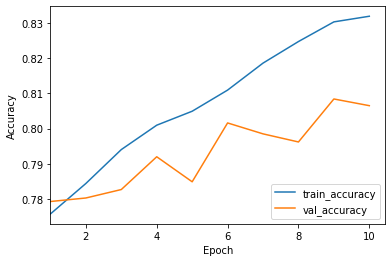

In [41]:
# Have a look at the training graphs. 
# When your validation accuracy is >0.8, you can upload it to the Moodle quiz.

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([1, None])
plt.legend(loc='lower right')